In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('NCHS_-_Leading_Causes_of_Death__United_States.csv')

In [3]:
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


In [4]:
data.shape

(10868, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null int64
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [6]:
data.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


In [7]:
data.isnull().count()

Year                       10868
113 Cause Name             10868
Cause Name                 10868
State                      10868
Deaths                     10868
Age-adjusted Death Rate    10868
dtype: int64

In [8]:
data['Year'] = pd.to_datetime(data.Year, format='%Y')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
Year                       10868 non-null datetime64[ns]
113 Cause Name             10868 non-null object
Cause Name                 10868 non-null object
State                      10868 non-null object
Deaths                     10868 non-null int64
Age-adjusted Death Rate    10868 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 509.6+ KB


In [10]:
data.tail(10)

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
10858,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Tennessee,675,12.3
10859,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Texas,1669,10.3
10860,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,United States,35525,13.0
10861,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Utah,135,9.1
10862,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,56,9.2
10863,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9
10867,1999-01-01,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wyoming,30,6.8


In [11]:
# split the column and make a separete column
data[['cause1','cause2']] = data["113 Cause Name"].str.rsplit(" ", n = 1, expand = True)

In [12]:
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,cause1,cause2
0,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
1,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
2,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
3,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
4,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"


In [13]:
data = data.rename(columns = {'cause1':'Disease Cause'}) # rename columns

In [14]:
data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause,cause2
0,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
1,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
2,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
3,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
4,2017-01-01,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"


In [15]:
data = data.drop('113 Cause Name',axis=1) # drop unwanted column

In [16]:
data.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause,cause2
0,2017-01-01,Unintentional injuries,United States,169936,49.4,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
1,2017-01-01,Unintentional injuries,Alabama,2703,53.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
2,2017-01-01,Unintentional injuries,Alaska,436,63.7,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
3,2017-01-01,Unintentional injuries,Arizona,4184,56.2,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"
4,2017-01-01,Unintentional injuries,Arkansas,1625,51.8,Accidents (unintentional injuries),"(V01-X59,Y85-Y86)"


In [17]:
data = data.drop('cause2',axis = 1) # drop unwanted column

In [18]:
data.tail()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause
10863,1999-01-01,Kidney disease,Virginia,1035,16.9,"Nephritis, nephrotic syndrome and nephrosis"
10864,1999-01-01,Kidney disease,Washington,278,5.2,"Nephritis, nephrotic syndrome and nephrosis"
10865,1999-01-01,Kidney disease,West Virginia,345,16.4,"Nephritis, nephrotic syndrome and nephrosis"
10866,1999-01-01,Kidney disease,Wisconsin,677,11.9,"Nephritis, nephrotic syndrome and nephrosis"
10867,1999-01-01,Kidney disease,Wyoming,30,6.8,"Nephritis, nephrotic syndrome and nephrosis"


In [19]:
data['State'].nunique() # count no of unique value in state

52

In [20]:
data['Cause Name'].nunique() # count no of unique values in cause name 

11

In [21]:
data['Cause Name'].unique()

array(['Unintentional injuries', 'All causes', "Alzheimer's disease",
       'Stroke', 'CLRD', 'Diabetes', 'Heart disease',
       'Influenza and pneumonia', 'Suicide', 'Cancer', 'Kidney disease'],
      dtype=object)

In [22]:
data['Disease Cause'].unique()

array(['Accidents (unintentional injuries)', 'All', "Alzheimer's disease",
       'Cerebrovascular diseases', 'Chronic lower respiratory diseases',
       'Diabetes mellitus', 'Diseases of heart',
       'Influenza and pneumonia', 'Intentional self-harm (suicide)',
       'Malignant neoplasms',
       'Nephritis, nephrotic syndrome and nephrosis'], dtype=object)

In [23]:
#data with states and exclude all causes
df1 =  data.loc[(data['State'] != 'United States') & (data['Cause Name'] != 'All causes')]

In [24]:
df1.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause
1,2017-01-01,Unintentional injuries,Alabama,2703,53.8,Accidents (unintentional injuries)
2,2017-01-01,Unintentional injuries,Alaska,436,63.7,Accidents (unintentional injuries)
3,2017-01-01,Unintentional injuries,Arizona,4184,56.2,Accidents (unintentional injuries)
4,2017-01-01,Unintentional injuries,Arkansas,1625,51.8,Accidents (unintentional injuries)
5,2017-01-01,Unintentional injuries,California,13840,33.2,Accidents (unintentional injuries)


In [25]:
#data with united states and all causes which gives total no of deaths on a given calender year
df2 = data.loc[(data['State'] == 'United States') & (data['Cause Name'] == 'All causes')]
df2.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause
52,2017-01-01,All causes,United States,2813503,731.9,All
668,2016-01-01,All causes,United States,2744248,728.8,All
1240,2015-01-01,All causes,United States,2712630,733.1,All
1812,2014-01-01,All causes,United States,2626418,724.6,All
2384,2013-01-01,All causes,United States,2596993,731.9,All


In [26]:
#data with united states only excluding all causes
df = data.loc[(data['State'] == 'United States') & (data['Cause Name'] != 'All causes')]

In [27]:
df.head()

,Year,Cause Name,State,Deaths,Age-adjusted Death Rate,Disease Cause
0,2017-01-01,Unintentional injuries,United States,169936,49.4,Accidents (unintentional injuries)
104,2017-01-01,Alzheimer's disease,United States,121404,31.0,Alzheimer's disease
156,2017-01-01,Stroke,United States,146383,37.6,Cerebrovascular diseases
208,2017-01-01,CLRD,United States,160201,40.9,Chronic lower respiratory diseases
260,2017-01-01,Diabetes,United States,83564,21.5,Diabetes mellitus


In [28]:
df_clean = df.drop('Cause Name',axis = 1)

In [29]:
df_clean.rename(columns = {'State':'Country'})

,Year,Country,Deaths,Age-adjusted Death Rate,Disease Cause
0,2017-01-01,United States,169936,49.4,Accidents (unintentional injuries)
104,2017-01-01,United States,121404,31.0,Alzheimer's disease
156,2017-01-01,United States,146383,37.6,Cerebrovascular diseases
208,2017-01-01,United States,160201,40.9,Chronic lower respiratory diseases
260,2017-01-01,United States,83564,21.5,Diabetes mellitus
...,...,...,...,...,...
10652,1999-01-01,United States,725192,266.5,Diseases of heart
10704,1999-01-01,United States,63730,23.5,Influenza and pneumonia
10756,1999-01-01,United States,29199,10.5,Intentional self-harm (suicide)
10808,1999-01-01,United States,549838,200.8,Malignant neoplasms


In [30]:
df_clean.reset_index()

,index,Year,State,Deaths,Age-adjusted Death Rate,Disease Cause
0,0,2017-01-01,United States,169936,49.4,Accidents (unintentional injuries)
1,104,2017-01-01,United States,121404,31.0,Alzheimer's disease
2,156,2017-01-01,United States,146383,37.6,Cerebrovascular diseases
3,208,2017-01-01,United States,160201,40.9,Chronic lower respiratory diseases
4,260,2017-01-01,United States,83564,21.5,Diabetes mellitus
...,...,...,...,...,...,...
185,10652,1999-01-01,United States,725192,266.5,Diseases of heart
186,10704,1999-01-01,United States,63730,23.5,Influenza and pneumonia
187,10756,1999-01-01,United States,29199,10.5,Intentional self-harm (suicide)
188,10808,1999-01-01,United States,549838,200.8,Malignant neoplasms


In [31]:
df_clean.head()

,Year,State,Deaths,Age-adjusted Death Rate,Disease Cause
0,2017-01-01,United States,169936,49.4,Accidents (unintentional injuries)
104,2017-01-01,United States,121404,31.0,Alzheimer's disease
156,2017-01-01,United States,146383,37.6,Cerebrovascular diseases
208,2017-01-01,United States,160201,40.9,Chronic lower respiratory diseases
260,2017-01-01,United States,83564,21.5,Diabetes mellitus


In [32]:
df_clean['Deaths'].describe()

count       190.000000
mean     190950.436842
std      212900.751965
min       29199.000000
25%       55338.250000
50%      104139.500000
75%      153465.500000
max      725192.000000
Name: Deaths, dtype: float64

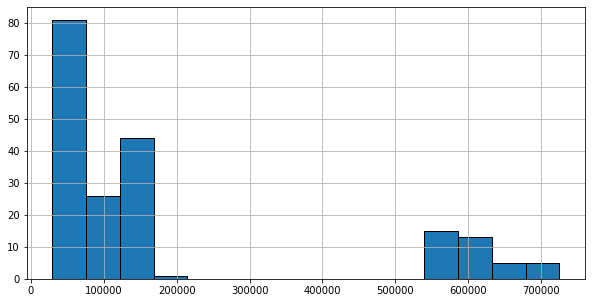

In [33]:
# Frequency distribution of deaths

df_clean['Deaths'].hist(edgecolor='black',bins=15,figsize=(10,5));

In [34]:
death_year = df_clean.groupby(['Year']).sum()
death_year

,Deaths,Age-adjusted Death Rate
Year,,
1999-01-01,1905826,698.1
2000-01-01,1902194,688.0
2001-01-01,1899358,675.7
2002-01-01,1918873,672.1
2003-01-01,1912115,658.8
2004-01-01,1864133,632.6
2005-01-01,1889981,628.8
2006-01-01,1854676,604.8
2007-01-01,1846301,590.3


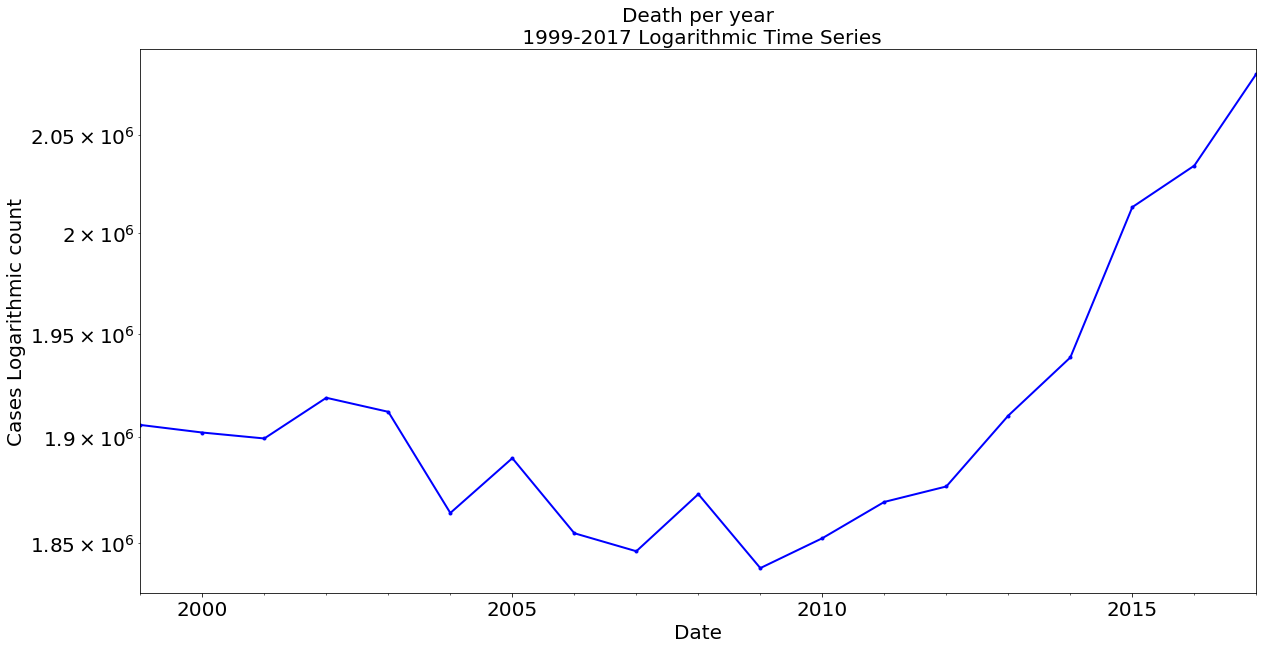

In [37]:
death_year['Deaths'].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Cases Logarithmic count', fontsize=20);
plt.title('Death per year\n 1999-2017 Logarithmic Time Series', fontsize=20);

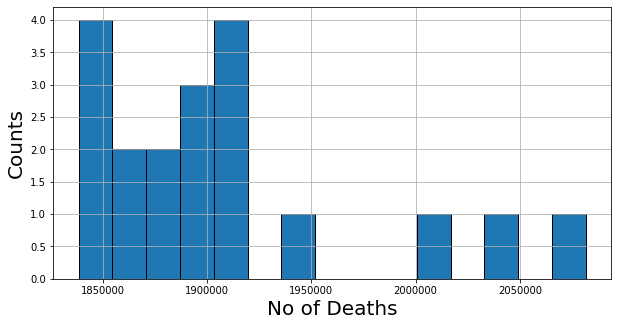

In [44]:
death_year['Deaths'].hist(edgecolor='black',bins=15,figsize=(10,5))
plt.xlabel('No of Deaths', fontsize = 20)
plt.ylabel('Counts',fontsize = 20);

In [39]:
import seaborn as sns

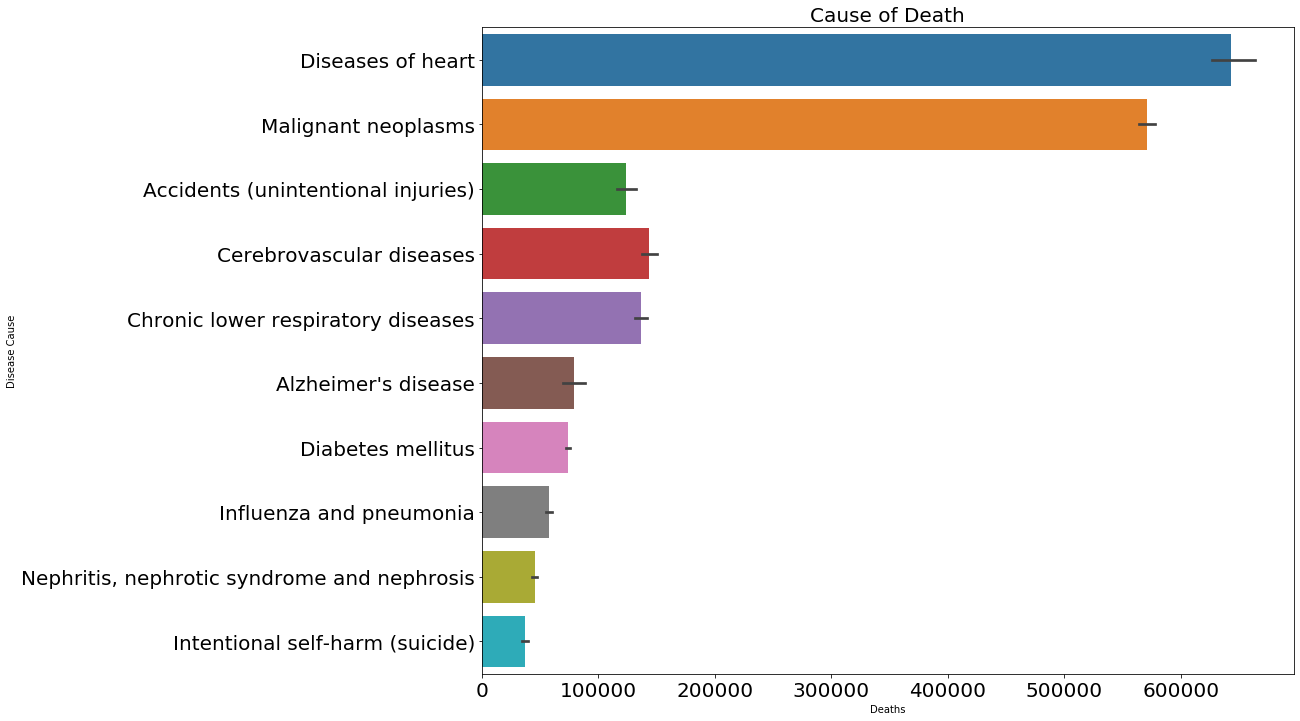

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x="Deaths", y="Disease Cause", label='small', data=df_clean.sort_values(by="Deaths",ascending=False))
plt.title('Cause of Death', fontsize=20)
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.show()

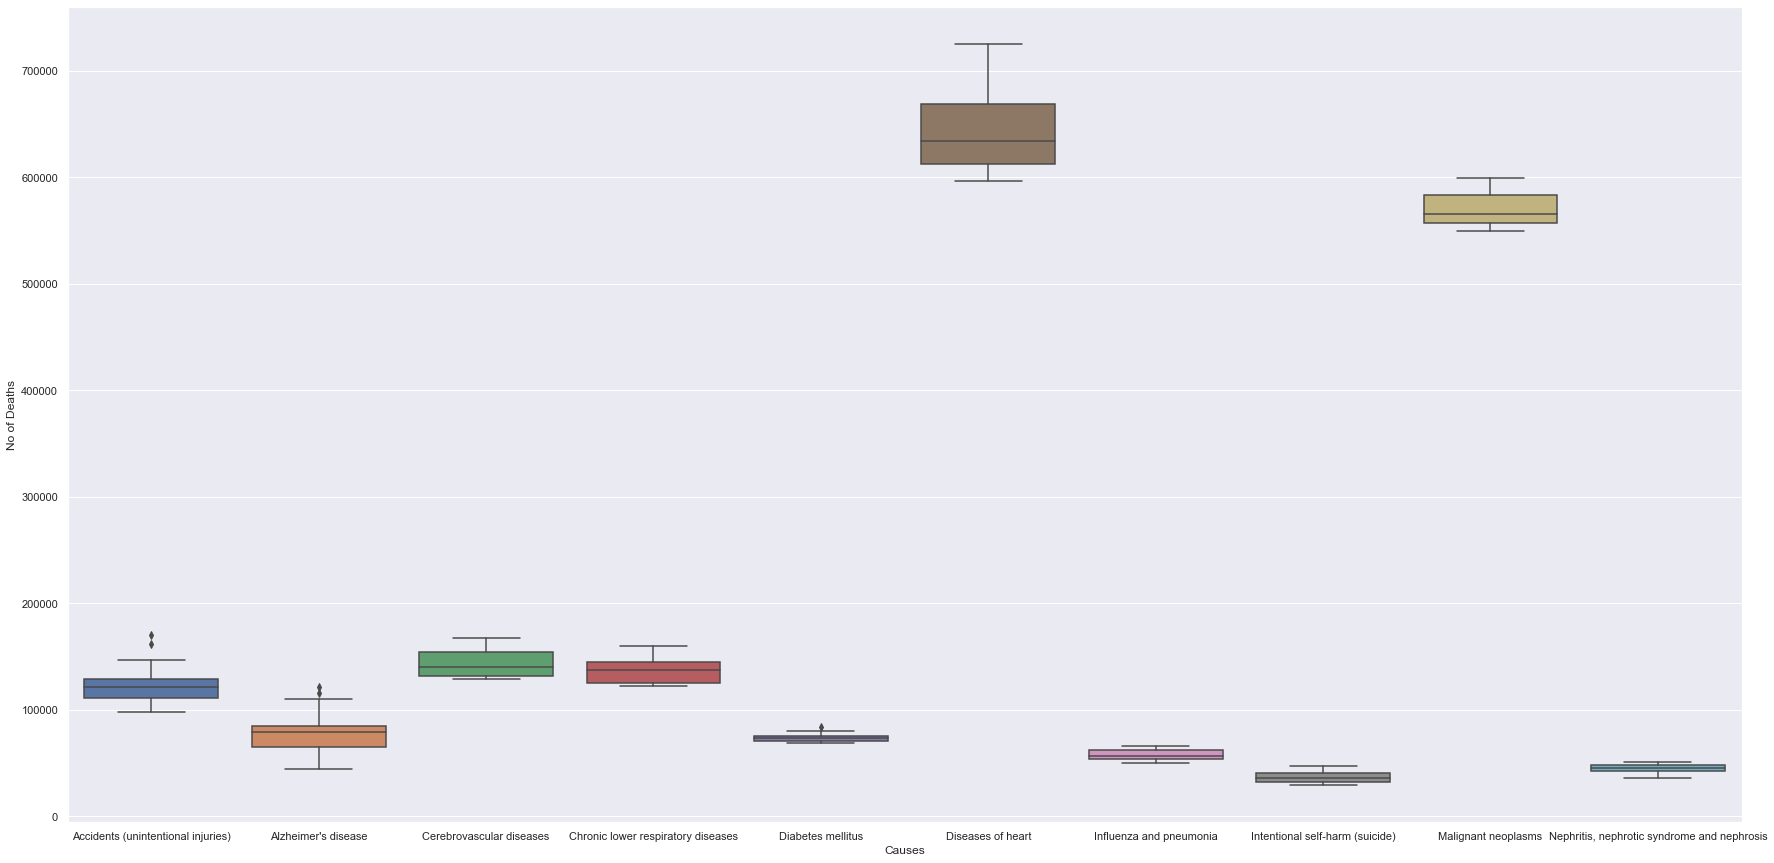

In [52]:
plt.figure(figsize=(30,15))
_ = sns.boxplot(x='Disease Cause',y='Deaths',data=df_clean)
_ = plt.xlabel('Causes')
_ = plt.ylabel('No of Deaths')
plt.show()

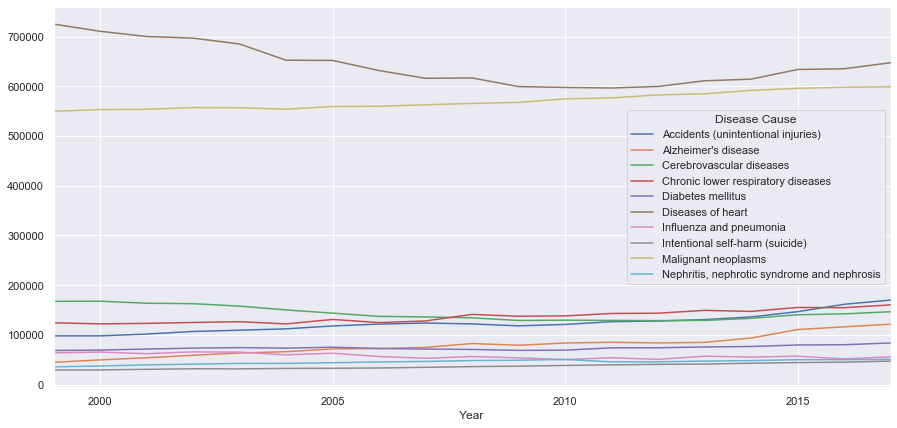

In [58]:
#df_clean = df_clean.groupby(['Year', 'Disease Cause'])['Deaths'].sum().unstack()
#df_clean = df_clean[1999::3, :]
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df_clean.groupby(['Year','Disease Cause']).sum()['Deaths'].unstack().plot(ax=ax);

In [ ]:
mean = np.mean(df_clean['Deaths'])
std = np.std.random.normal(mean,std,size=100000)

In [ ]:
import sklearn

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_clean['Disease Cause'] = lb_make.fit_transform(df['Disease Cause'])

df_clean.head() #Results in appending a new column to df

In [ ]:
df_clean.loc[df_clean['Year'].idxmax()]

In [ ]:
df_clean.loc[df_clean['Year'].idxmin]

In [ ]:
import seaborn as sns

ax = sns.pointplot(x="Year",y="Deaths",hue = "Disease Cause",data = df_clean,figsize = (15,30))

In [ ]:
sns.set()
n_data = len(df_clean['Deaths'])
n_bins = np.sqrt(len(df_clean['Deaths']))
n_bins =int(n_bins)
_ = plt.hist(df_clean['Deaths'],bins = n_bins)
_ = plt.xlabel('No of Deaths')
_ = plt.ylabel('Count')

In [ ]:
_= sns.swarmplot(x='Disease Cause',y='Deaths',data = df_clean)
_= plt.xlabel('Causes')
_= plt.ylabel('No of Deaths')
plt.show()

In [ ]:
deaths_year = df.groupby(['Year','Cause Name'])['Deaths']

In [ ]:
print(deaths_year)

In [ ]:
deaths_year.head()

In [ ]:
deaths_year.plot(figsize=(10,7))
plt.ylabel('Total Deaths in millions')

In [ ]:
result = 0
for i in range(100):
    result += i
print(result)

In [ ]:
print(range(100))

In [ ]:
df1 = data[data['State'].str.match('United States')]

In [ ]:
df1.head()

In [ ]:
df1.shape

In [ ]:
df2 = df1[df1['Cause Name'].str.match('All causes')]

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df = data.set_index("State", drop = False)

In [ ]:
df.head()

In [ ]:
df.loc['United States']

In [ ]:
#data = data.drop([0]) # drop first row assigned for USA

In [ ]:
#data.head()

In [ ]:
#data.describe()

In [ ]:
data['Cause Name'].unique()

In [ ]:
data['Disease Cause'].unique()

In [ ]:
data['State'].unique()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# settings for the histogram
sns.set(font_scale =2)
plt.ylim(0,80)
plt.xlim(0,1000)

data['Deaths'].hist(bins=50,density = True)

In [ ]:
data['Cause Name'].value_counts()[:15]

In [ ]:
data['Disease Cause'].value_counts()[:15]

In [ ]:
data.head()

In [ ]:
data['Cause Name'].unique()

In [ ]:
data['cause1'].unique()

In [ ]:
data1

In [ ]:
data.head()

In [ ]:
data2 = data.pop('cause2')

In [ ]:
data.head()

In [ ]:
data = data.rename(columns = {'cause1':'Disease Cause'})

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
#data.loc['Year'] = pd.to_datetime(data.Year,infer_datetime_format=True)
#data.dtypes

#pd.Series(['Year'] * 1000)
#data.loc[:,'Year'] = pd.to_datetime(data.Year)

data['Year'] = pd.to_datetime(data['Year']/1000, unit = 's')

In [ ]:
data.head(50)

In [ ]:
data['Cause Name'] = data['Cause Name'].astype('str')
data['State'] = data['State'].astype('str')
data['Disease Cause'] = data['Disease Cause'].astype('str')

#df['column'].astype('|S80')
#df['column'] = df['column'].astype('|S')

In [ ]:
for c in data.columns:
    if data[c].dtype == object:
        print ("convert ", data[c].name, " to string")
        data[c] = data[c].astype(str)

In [ ]:
data.info()

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
# Splitting 113 cause name column into two seperate column
new = data["113 Cause Name"].str.strip("")

In [ ]:
data['extract_1']= data['State'].str.extract('State==United States') # extract string after ()

In [ ]:
new.head()

In [ ]:
# Splitting 113 cause name column into two seperate column
new = data["113 Cause Name"].str.split(" ", n = 2, expand = True) 

In [ ]:
new.head()

In [ ]:
data["Causes"]= new[0] 
data["Causes_name"]= new[1] 
data["causes_2"] = new[2]
data['causes_3']=new[3]

In [ ]:
data.tail(100)

In [ ]:
cause_count = {}
for entry in cause_extraction:
    if entry in cause_count.keys():
        cause_count[entry]+=1
    else:
        cause_count[entry]=1
        
print(cause_count)

In [ ]:
data['extract_1']= data['113 Cause Name'].str.extract('.*\((.*)\).*',expand=True)

In [ ]:
data.head()

In [ ]:
dogs = ['Joker', 'Simon', 'Ellie', 'Lishka', 'Fido'] 
for g in dogs:
    print (g) 

In [ ]:
# for disease
df_group = df_clean.groupby('Year')[['Disease Cause','Deaths']]

In [ ]:
df_group.head()